# Exploring Dandiset 001341: Barrel Cortex Activity During Tactile VR Navigation

**IMPORTANT**: This notebook was AI-generated with human supervision and has not been fully verified. Please be cautious when interpreting the code or results. Always validate the analyses for your specific research needs.

## Dataset Overview

This dataset ([DANDI:001341](https://neurosift.app/dandiset/001341)) contains electrophysiological recordings from the C2 barrel column of the primary somatosensory cortex (wS1) in mice during a tactile virtual reality (VR) navigation task. Key features of the experiment:

* Mice are head-fixed on a suspended ball
* Two walls are placed on either side of the mouse
* Wall movement is coupled to the mouse's trajectory in a closed-loop system
* Mice perform an unrewarded 2-alternative forced choice (2AFC) task
* Trial structure:
    * 100cm closed-loop baseline straight running
    * 2-second open-loop turn (left/right)
* Recording site: C2 barrel column
* Genotype: Scnn1a-TG3-Cre x Ai32

## Setting Up the Environment

First, let's import the required packages and load the data. We'll use `pynwb` for reading the NWB files and `lindi` for remote data access.

In [1]:
import pynwb
import lindi
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load the NWB file for subject 489
print('Loading NWB file...')
f = lindi.LindiH5pyFile.from_lindi_file("https://lindi.neurosift.org/dandi/dandisets/001341/assets/e3d421c3-13bf-4b2e-b0f9-b6357a885de9/nwb.lindi.json")
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

Loading NWB file...


## Basic Session Information

Let's look at the key information about this recording session:

In [2]:
print('Subject Information:')
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Age: {nwb.subject.age}")
print(f"Sex: {nwb.subject.sex}")
print(f"Genotype: {nwb.subject.genotype}")
print(f"\nRecording Date: {nwb.session_start_time}")
print(f"Institution: {nwb.institution}")
print(f"Lab: {nwb.lab}")

Subject Information:
Subject ID: 489
Age: P63D
Sex: F
Genotype: Scnn1a-TG3-Cre x Ai32

Recording Date: 2022-07-08 00:00:00-05:00
Institution: University of Illinois
Lab: Vlasov BioLab


## Neural Data Overview and Quality Metrics

The dataset contains recordings from multiple units in the C2 barrel column. Let's examine their basic properties and quality metrics:

Number of recorded units: 65


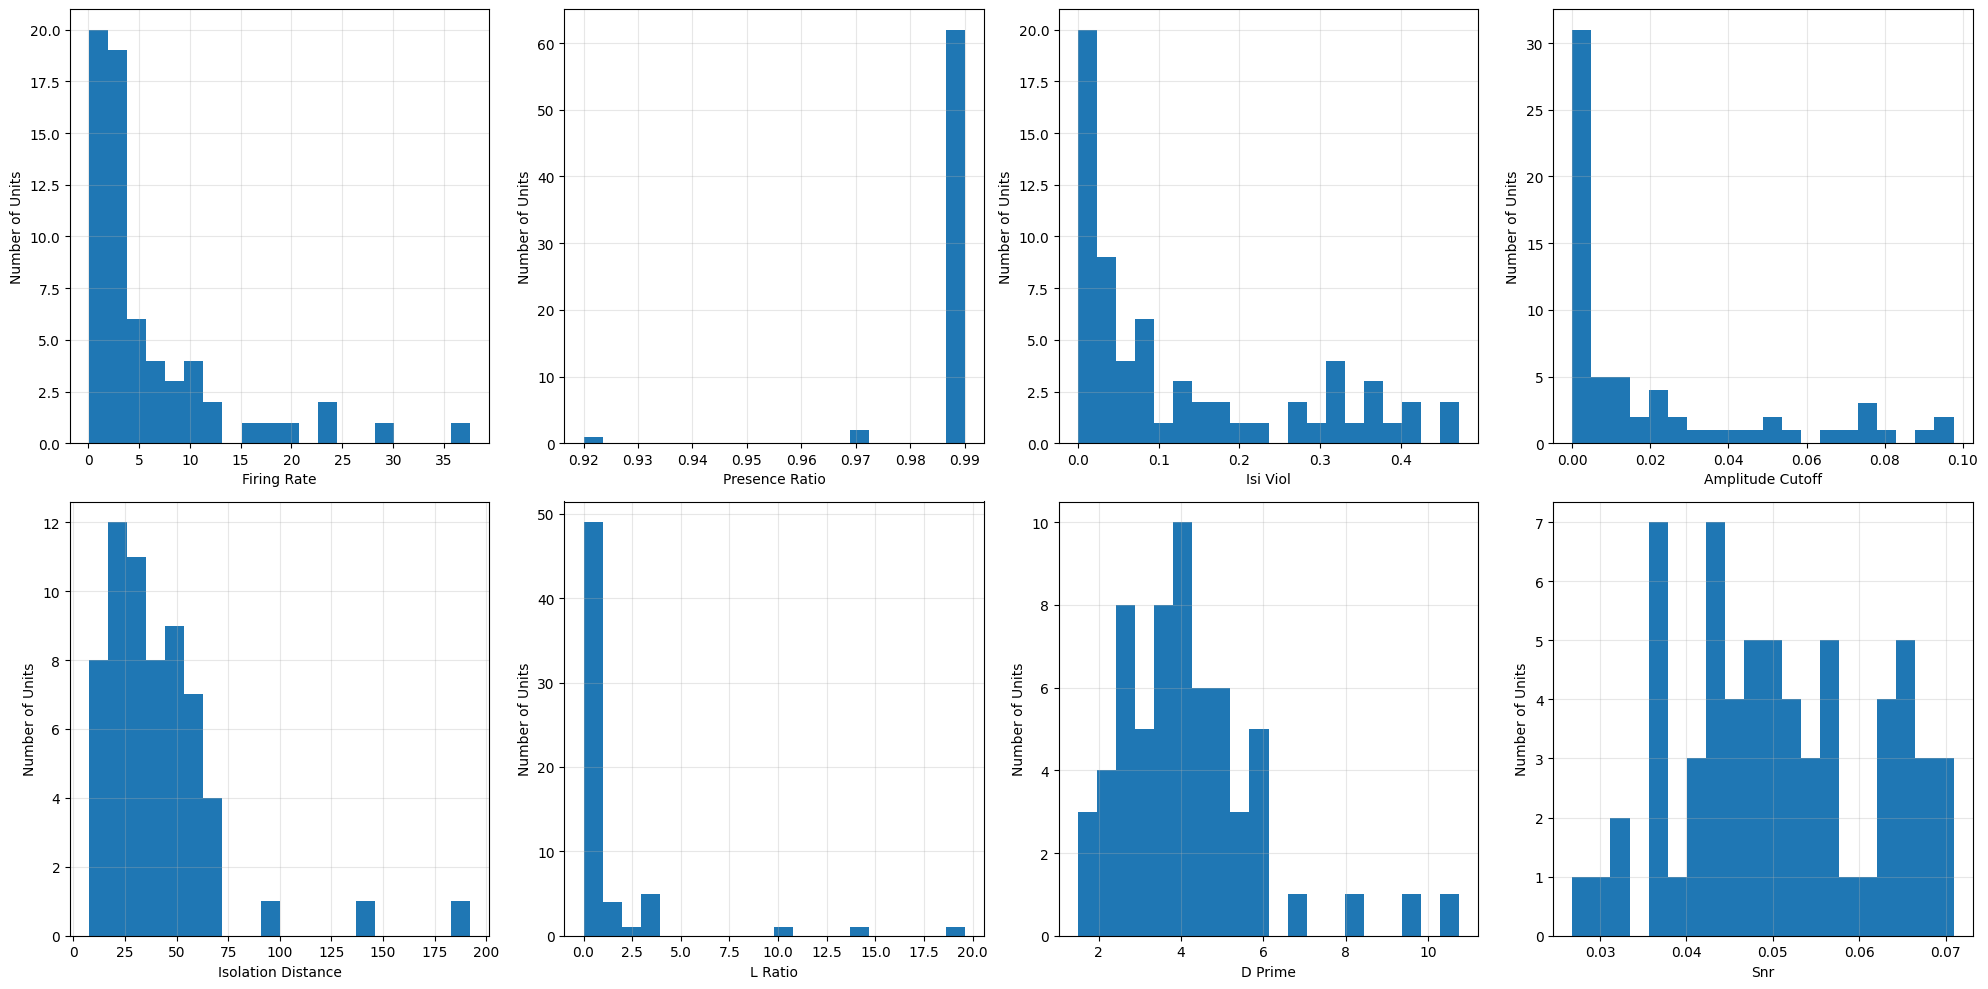


Quality Metrics Summary:

Firing Rate:
  Mean ± SD: 6.03 ± 7.27
  Range: 0.10 to 37.57

Presence Ratio:
  Mean ± SD: 0.99 ± 0.01
  Range: 0.92 to 0.99

Isi Viol:
  Mean ± SD: 0.13 ± 0.14
  Range: 0.00 to 0.47

Amplitude Cutoff:
  Mean ± SD: 0.02 ± 0.03
  Range: 0.00 to 0.10

Isolation Distance:
  Mean ± SD: nan ± nan
  Range: nan to nan

L Ratio:
  Mean ± SD: nan ± nan
  Range: nan to nan

D Prime:
  Mean ± SD: nan ± nan
  Range: nan to nan

Snr:
  Mean ± SD: 0.05 ± 0.01
  Range: 0.03 to 0.07


In [3]:
# Get number of units
n_units = len(nwb.units['spike_times'])
print(f"Number of recorded units: {n_units}")

# Create a summary of key quality metrics
quality_metrics = {
    'firing_rate': nwb.units['firing_rate'].data[:],
    'presence_ratio': nwb.units['presence_ratio'].data[:],
    'isi_viol': nwb.units['isi_viol'].data[:],
    'amplitude_cutoff': nwb.units['amplitude_cutoff'].data[:],
    'isolation_distance': nwb.units['isolation_distance'].data[:],
    'l_ratio': nwb.units['l_ratio'].data[:],
    'd_prime': nwb.units['d_prime'].data[:],
    'snr': nwb.units['snr'].data[:]
}

# Plot quality metrics distributions
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, (metric, values) in enumerate(quality_metrics.items()):
    axes[i].hist(values, bins=20)
    axes[i].set_xlabel(metric.replace('_', ' ').title())
    axes[i].set_ylabel('Number of Units')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nQuality Metrics Summary:")
for metric, values in quality_metrics.items():
    print(f"\n{metric.replace('_', ' ').title()}:")
    print(f"  Mean ± SD: {np.mean(values):.2f} ± {np.std(values):.2f}")
    print(f"  Range: {np.min(values):.2f} to {np.max(values):.2f}")

## Unit Classification and Characteristics

Let's examine the units' characteristics including:

* Recording depth
* Layer distribution
* Waveform properties

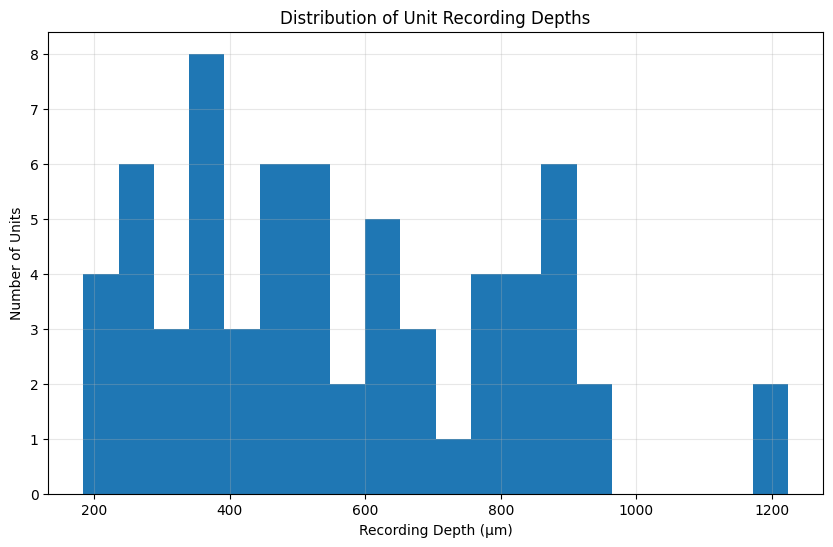


Units per layer:
0: 2 units
23: 7 units
4: 13 units
5A: 13 units
5B: 17 units
6: 13 units


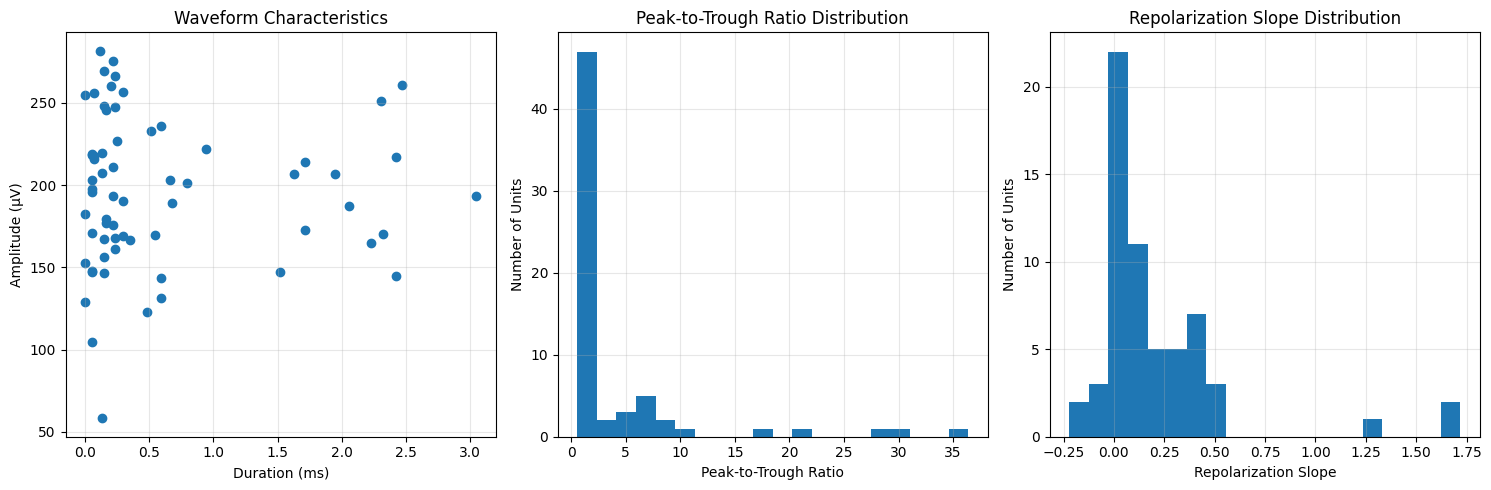

In [4]:
# Get unit characteristics
depths = nwb.units['depth'].data[:]
layers = nwb.units['layer'].data[:]
unit_types = nwb.units['unit_type'].data[:]

# Plot depth distribution
plt.figure(figsize=(10, 6))
plt.hist(depths, bins=20)
plt.xlabel('Recording Depth (µm)')
plt.ylabel('Number of Units')
plt.title('Distribution of Unit Recording Depths')
plt.grid(True, alpha=0.3)
plt.show()

# Count units per layer
unique_layers = np.unique(layers)
layer_counts = {layer: np.sum(layers == layer) for layer in unique_layers}

print("\nUnits per layer:")
for layer, count in layer_counts.items():
    print(f"{layer}: {count} units")

# Plot waveform characteristics
plt.figure(figsize=(15, 5))

# Duration vs. Amplitude
plt.subplot(131)
plt.scatter(nwb.units['duration'].data[:], nwb.units['amplitude_waveform'].data[:])
plt.xlabel('Duration (ms)')
plt.ylabel('Amplitude (µV)')
plt.title('Waveform Characteristics')
plt.grid(True, alpha=0.3)

# PT ratio
plt.subplot(132)
plt.hist(nwb.units['PT_ratio'].data[:], bins=20)
plt.xlabel('Peak-to-Trough Ratio')
plt.ylabel('Number of Units')
plt.title('Peak-to-Trough Ratio Distribution')
plt.grid(True, alpha=0.3)

# Repolarization slope
plt.subplot(133)
plt.hist(nwb.units['repolarization_slope'].data[:], bins=20)
plt.xlabel('Repolarization Slope')
plt.ylabel('Number of Units')
plt.title('Repolarization Slope Distribution')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Trial Structure and PSTH Analysis

Each trial consists of a baseline straight running period followed by a turn. Let's analyze the trial structure and create PSTHs aligned to trial events:

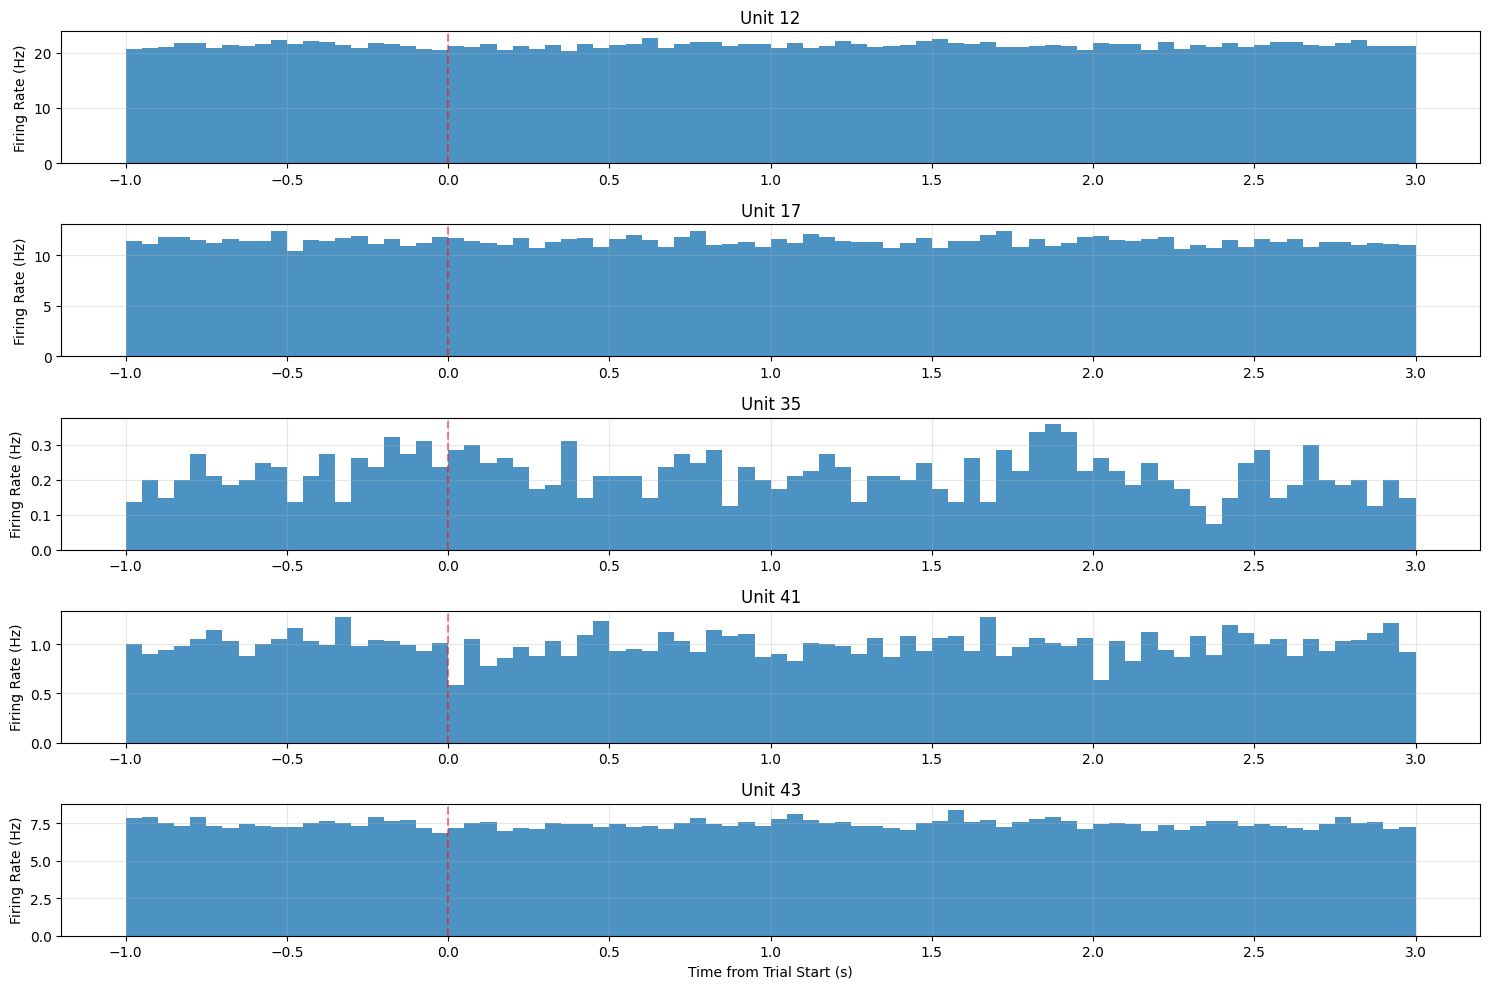


Trial Statistics:
Number of trials: 1611
Average trial duration: 3.87 seconds
Trial duration range: 2.00 to 18.42 seconds


In [5]:
def create_psth(spike_times, event_times, window=(-1, 3), bin_size=0.05):
    """
    Create a PSTH aligned to specified events
    
    Parameters:
    -----------
    spike_times : array
        Spike times for a unit
    event_times : array
        Times of events to align to
    window : tuple
        Time window around event (in seconds)
    bin_size : float
        Size of bins (in seconds)
    
    Returns:
    --------
    hist : array
        PSTH counts
    bin_centers : array
        Centers of time bins
    """
    bins = np.arange(window[0], window[1] + bin_size, bin_size)
    bin_centers = bins[:-1] + bin_size/2
    all_spikes = []
    
    for event_time in event_times:
        # Get spikes within window of this event
        mask = (spike_times >= event_time + window[0]) & (spike_times <= event_time + window[1])
        relative_times = spike_times[mask] - event_time
        all_spikes.extend(relative_times)
    
    hist, _ = np.histogram(all_spikes, bins=bins)
    return hist / (len(event_times) * bin_size), bin_centers  # Convert to Hz

# Get trial start times
trials = nwb.intervals['trials']
trial_starts = trials['file_start_time'].data[:]

# Create PSTHs for example units
n_example_units = 5
window = (-1, 3)  # 1 second before to 3 seconds after trial start
bin_size = 0.05  # 50ms bins

plt.figure(figsize=(15, 10))
for i in range(n_example_units):
    unit_id = nwb.units['id'].data[i]
    spike_times = nwb.units['spike_times'][i]
    
    # Create PSTH
    psth, bin_centers = create_psth(spike_times, trial_starts, window, bin_size)
    
    plt.subplot(n_example_units, 1, i+1)
    plt.bar(bin_centers, psth, width=bin_size, alpha=0.8)
    plt.axvline(x=0, color='r', linestyle='--', alpha=0.5)
    plt.title(f'Unit {unit_id}')
    plt.ylabel('Firing Rate (Hz)')
    if i == n_example_units-1:
        plt.xlabel('Time from Trial Start (s)')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print some trial statistics
trial_durations = trials['file_stop_time'].data[:] - trials['file_start_time'].data[:]
print(f"\nTrial Statistics:")
print(f"Number of trials: {len(trial_durations)}")
print(f"Average trial duration: {np.mean(trial_durations[trial_durations > 0]):.2f} seconds")
print(f"Trial duration range: {np.min(trial_durations[trial_durations > 0]):.2f} to {np.max(trial_durations):.2f} seconds")

## Movement Analysis

The dataset includes detailed movement information:
* Absolute speed
* Forward speed
* Lateral speed

Let's analyze movement patterns and their relationship with neural activity:

**Note**: To manage memory usage and data streaming, we'll analyze a subset of the data.

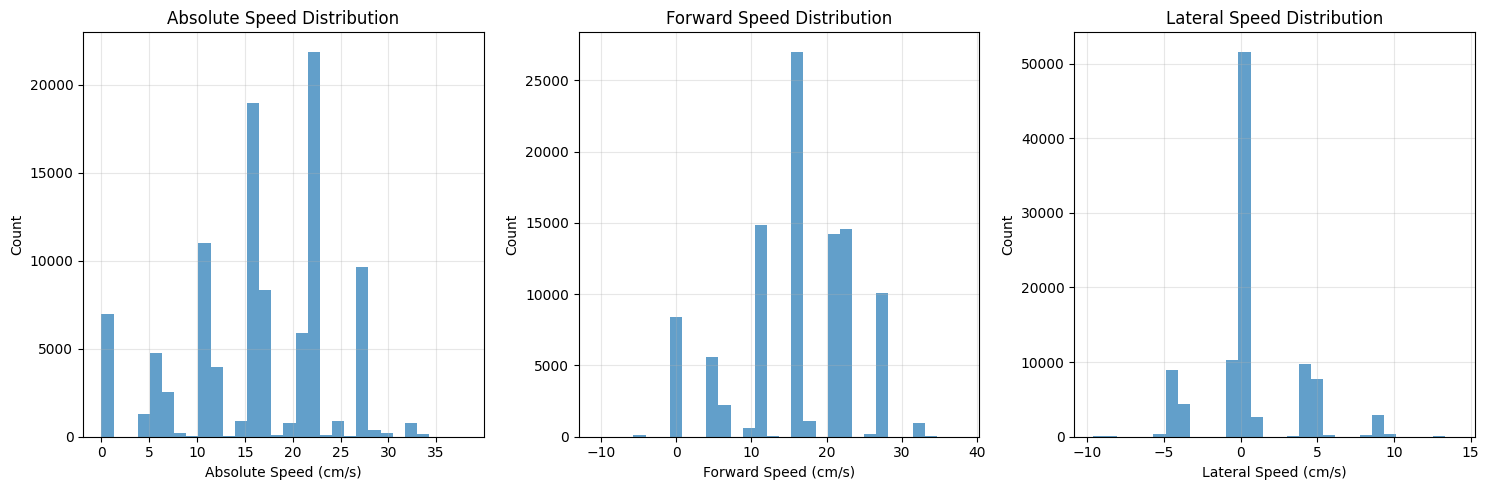

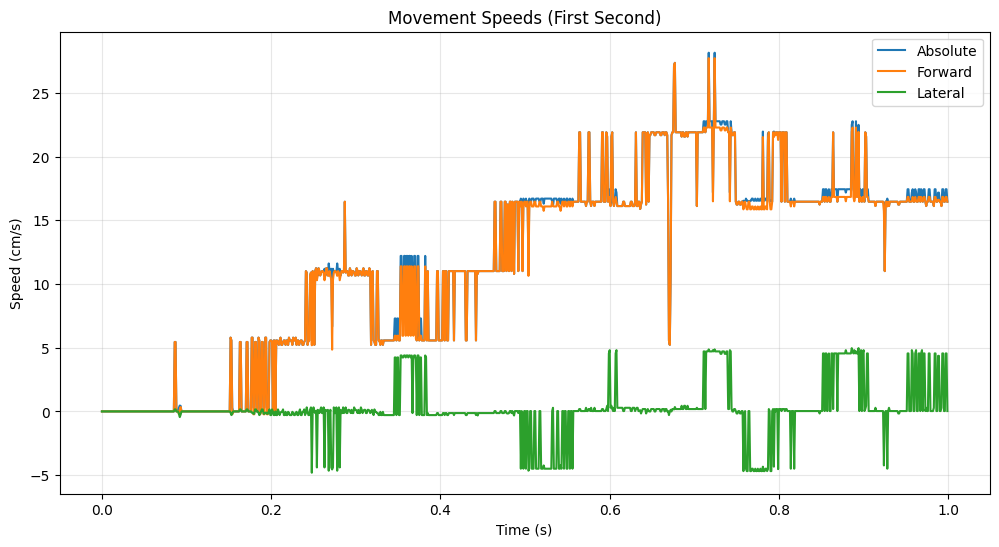

In [6]:
# Load a subset of movement data
sample_size = 100000  # First 100,000 samples
speed_abs = nwb.acquisition['speed_abs'].data[:sample_size]
speed_for = nwb.acquisition['speed_for'].data[:sample_size]
speed_lat = nwb.acquisition['speed_lat'].data[:sample_size]
timestamps = np.linspace(0, sample_size/1000, sample_size)  # Approximate timestamps assuming 1kHz

# Plot speed distributions
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.hist(speed_abs, bins=30, alpha=0.7)
plt.xlabel('Absolute Speed (cm/s)')
plt.ylabel('Count')
plt.title('Absolute Speed Distribution')
plt.grid(True, alpha=0.3)

plt.subplot(132)
plt.hist(speed_for, bins=30, alpha=0.7)
plt.xlabel('Forward Speed (cm/s)')
plt.ylabel('Count')
plt.title('Forward Speed Distribution')
plt.grid(True, alpha=0.3)

plt.subplot(133)
plt.hist(speed_lat, bins=30, alpha=0.7)
plt.xlabel('Lateral Speed (cm/s)')
plt.ylabel('Count')
plt.title('Lateral Speed Distribution')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Plot example movement trace
plt.figure(figsize=(12, 6))
plt.plot(timestamps[:1000], speed_abs[:1000], label='Absolute')
plt.plot(timestamps[:1000], speed_for[:1000], label='Forward')
plt.plot(timestamps[:1000], speed_lat[:1000], label='Lateral')
plt.xlabel('Time (s)')
plt.ylabel('Speed (cm/s)')
plt.title('Movement Speeds (First Second)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Speed Modulation of Neural Activity

Finally, let's examine how neural activity relates to movement speed:

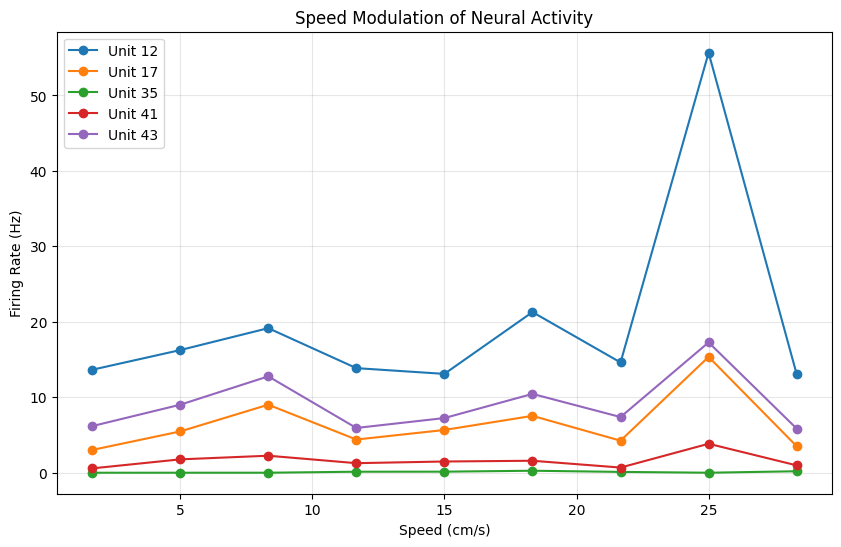


Speed Modulation Indices:
Unit 12: 0.620
Unit 17: 0.672
Unit 35: 1.000
Unit 41: 0.740
Unit 43: 0.494


In [7]:
# Set up speed bins
speed_bins = np.linspace(0, 30, 10)  # 0 to 30 cm/s in 10 bins
speed_centers = (speed_bins[1:] + speed_bins[:-1]) / 2

# Calculate firing rate vs speed for example units
firing_vs_speed = np.zeros((n_example_units, len(speed_bins)-1))
for i in range(n_example_units):
    unit_id = nwb.units['id'].data[i]
    spike_times = nwb.units['spike_times'][i]
    spike_mask = (spike_times >= timestamps[0]) & (spike_times <= timestamps[-1])
    spike_times_subset = spike_times[spike_mask]
    
    for j in range(len(speed_bins)-1):
        speed_mask = (speed_abs >= speed_bins[j]) & (speed_abs < speed_bins[j+1])
        time_in_bin = np.sum(speed_mask) / len(speed_abs) * (timestamps[-1] - timestamps[0])
        
        if time_in_bin > 0:
            n_spikes = np.sum((spike_times_subset >= timestamps[0]) & 
                            (spike_times_subset <= timestamps[-1]) &
                            (np.interp(spike_times_subset, timestamps, speed_abs) >= speed_bins[j]) &
                            (np.interp(spike_times_subset, timestamps, speed_abs) < speed_bins[j+1]))
            firing_vs_speed[i, j] = n_spikes / time_in_bin

# Plot speed modulation
plt.figure(figsize=(10, 6))
for i in range(n_example_units):
    plt.plot(speed_centers, firing_vs_speed[i], '-o', label=f'Unit {nwb.units["id"].data[i]}')
plt.xlabel('Speed (cm/s)')
plt.ylabel('Firing Rate (Hz)')
plt.title('Speed Modulation of Neural Activity')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Calculate speed modulation index
def calculate_speed_modulation(rates):
    """Calculate modulation index as (max-min)/(max+min)"""
    return (np.max(rates) - np.min(rates)) / (np.max(rates) + np.min(rates))

modulation_indices = [calculate_speed_modulation(rates) for rates in firing_vs_speed]
print("\nSpeed Modulation Indices:")
for i, mi in enumerate(modulation_indices):
    print(f"Unit {nwb.units['id'].data[i]}: {mi:.3f}")

## Research Applications

This dataset offers rich opportunities for investigating:
1. Neural coding of movement in barrel cortex
2. Decision-making in tactile navigation
3. Sensorimotor integration during active sensing

Key findings from our initial analysis:
* Units show varied quality metrics, with generally good isolation
* Clear depth distribution of units across cortical layers
* Distinct temporal patterns in trial-aligned activity (PSTHs)
* Some units show strong speed modulation

Potential further analyses could include:
* Trial-type specific neural responses (left vs right turns)
* Population dynamics during decision-making
* Relationship between whisking and neural activity
* Layer-specific activity patterns
* More sophisticated speed tuning analyses

**Note**: This notebook demonstrates basic analyses on a subset of the data. For comprehensive analyses, you may want to:
* Process the full dataset
* Include additional behavioral variables
* Analyze data from both recorded subjects
* Implement more sophisticated analytical techniques